Convolution Neural Network
    -comonly applied for computer vision
    -CNNs learns *local patterns* which are also translation invariant
    -layers learn different hierarchial patterns (simple to complex)
 
 
 **Local Patterns refers to the relationship that exist within smaller region of the input data

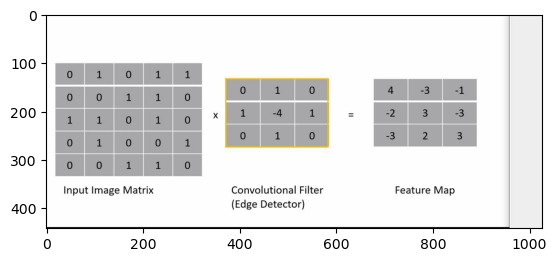

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('computer vision.JPG')
imgplot = plt.imshow(img)
plt.show()

Feature Map
    -complexities of 
    -In Convolutional Neural Networks (CNNs), a feature map is:
    -The output of a convolutional layer representing specific features in the input image or feature map

Convolution Layer: 


Types of filters
    - https://kharshit.github.io/img/edge_detection.png
    - https://ik.imagekit.io/octopusinvitro/images/uploads/2019/03/cnn-edge-filters.png
    - https://www.youtube.com/results?search_query=cnn+filters
    - Blur Filter ??
    
    
Parameters
    Stride : shifting the 


    
Pooling Layers:
    pooling layers play a crucial role in reducing the spatial dimensions of feature maps while preserving their depth. Let’s dive into the details:
   
   Max Pooling: Max pooling selects the maximum element from a region of the feature map covered by a filter. It helps retain the most prominent features.
    The output after a max-pooling layer contains the most significant features from the previous feature map.



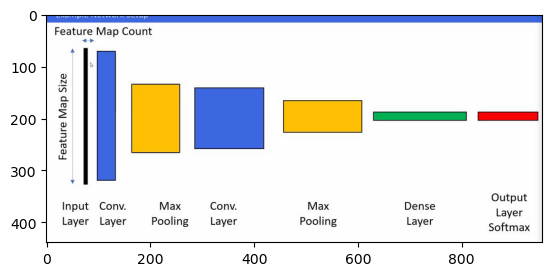

In [4]:
img = mpimg.imread('comp vis 2.JPG')
imgplot = plt.imshow(img)
plt.show()

### Combination of convolution layers and Pooling layers

### Image Preprocessing:

    -Original image -represented by puxels 
    -Dimensions(C,H,W): 1 for greyscale -3 for colored image
    
    --1-- Always very nice to resize the images first (sclaing/resizing) --croping 
    --2-- Convert to tensor
    --3-- Normalization (feature scaling) : normalize an image with mean and standard deviation
    
    
 ### Explore Hugging Face 
 https://www.bing.com/ck/a?!&&p=a80e84e6b418fa38JmltdHM9MTcxNTEyNjQwMCZpZ3VpZD0wODBlOTE4Zi1hNzRkLTY2ODgtMDAwMi04M2QyYTM0ZDY4MjUmaW5zaWQ9NTIxOA&ptn=3&ver=2&hsh=3&fclid=080e918f-a74d-6688-0002-83d2a34d6825&psq=hugging+face&u=a1aHR0cHM6Ly9odWdnaW5nZmFjZS5jby8&ntb=1

In [7]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

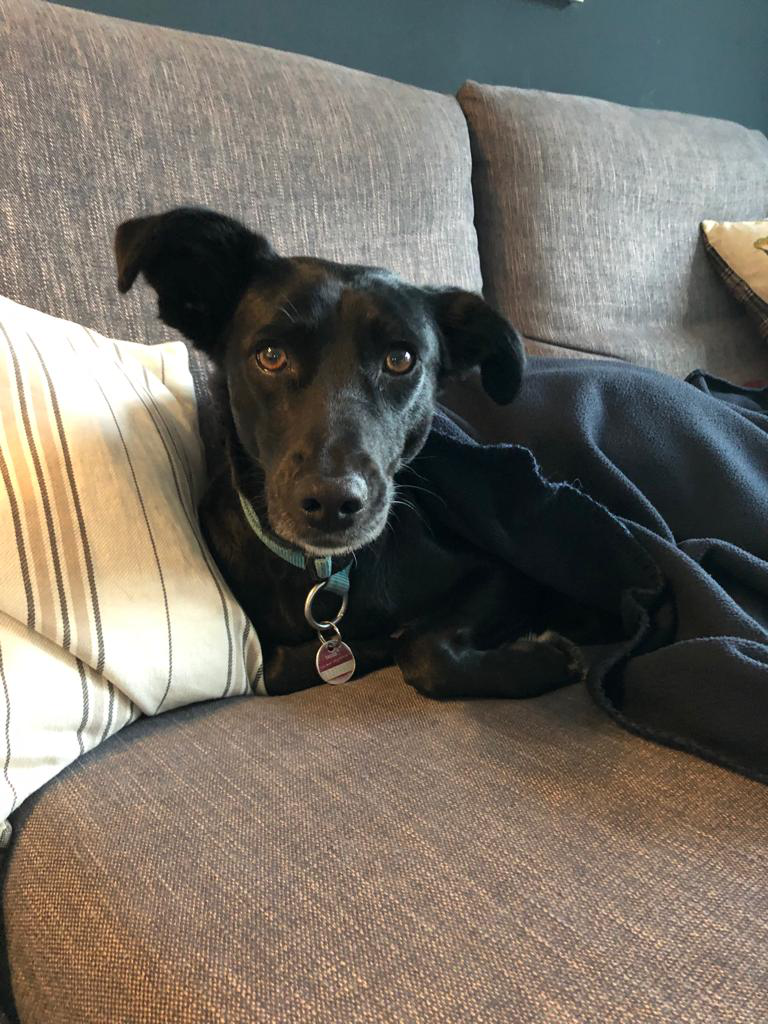

In [9]:
Img_path = 'kiki.jpg'
img = Image.open(Img_path)
img

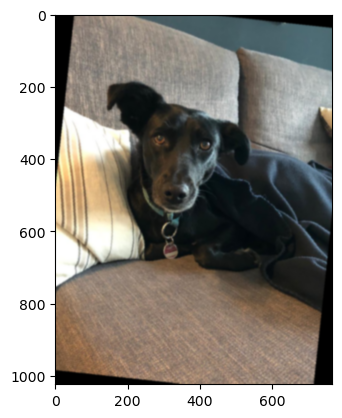

In [10]:
first_transformation = transforms.Compose([
    transforms.RandomRotation(45),
    #transforms.CenterCrop(200),
    transforms.GaussianBlur(kernel_size=11),
    #transforms.FiveCrop(200),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
 ])
# %%
x = first_transformation(img)
# %%
x.shape
#%% visualize the transformed image
plt.imshow(x.permute(1,2,0).numpy())
# %%

In [11]:
## Layer Calculations
import torch.nn as nn
import torch
from typing import OrderedDict


In [12]:
input = torch.rand(1,3,32,32) #Batch size, Color, Height, Weight

In [13]:
model = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3,8,3) ), #BS, color = No of Features, 30,30
    ('relu', nn.ReLU()),
    ('pool1', nn.MaxPool2d(2)), #Bs , feature dimension =8 , 15,15
    ('conv2', nn.Conv2d(8,16,3)),
    ('flatten', nn.Flatten()),
    ('output', nn.Linear(2704,1)), #binary classification
    ('sigmoid', nn.Sigmoid())

]))


model(input).shape

torch.Size([1, 1])

In [232]:
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
from sklearn.metrics import accuracy_score    

In [233]:
BATCH_SIZE = 4
EPOCHS = 15

In [234]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(),
    #transforms.CenterCrop(200),
    transforms.RandomHorizontalFlip(),
    #transforms.FiveCrop(200),
    transforms.ToTensor(),
 ])

In [235]:
ds_train = torchvision.datasets.ImageFolder(root='data/train',transform=transform)
ds_test =  torchvision.datasets.ImageFolder(root='data/test',transform=transform)

In [236]:
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=True)

In [237]:


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show() 

In [238]:
dataiter = iter(train_loader)
#next(dataiter)[0].shape
images, labels = next(dataiter)


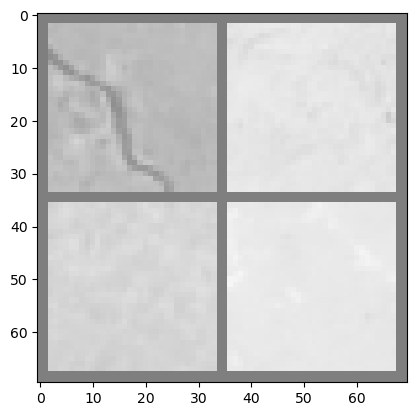

tensor([1, 0, 0, 0])


In [239]:
imshow(torchvision.utils.make_grid(images, nrow=2))
print(labels)

In [240]:
images.shape

labels.shape

torch.Size([4])

In [257]:


class BinaryClassificationModel(nn.Module):
    
    def __init__(self) -> None:
        super(BinaryClassificationModel,self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,3)
        #self.conv3 = nn.Conv2d(16,20,3)
        self.fc1 = nn.Linear(20*16*6*6,128)
        self.fc_out = nn.Linear(128,1) #128
        self.sigmoid = nn.Sigmoid()
        self.relu =nn.ReLU()
        #pass
    
    def forward(self,x): #input tensor
        x = self.conv1(x)
        x=self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x =self.relu(x)
        x =self.pool(x)
        #print(x.shape)
        #x = self.conv3(x)
        #x =self.relu(x)
        x =self.pool(x)
        x=torch.flatten(x,1)
        x =self.fc1(x)
        x = self.relu(x)
        x =self.fc_out(x)
        x = self.sigmoid(x)
        
        return x
    
    
#images -- Conv 2dimensionaö

In [254]:
model = BinaryClassificationModel()
#input = torch,

In [255]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [256]:
losses = []
for epoch in range(EPOCHS):
    loss_epoch = 0
    for i, data in enumerate(train_loader, 0):
        #print(i)
        input_imgs, true_labels = data
        #setting grad to zero
        optimizer.zero_grad()
        #print(data[0].shape)
        
        #forward pass
        pred_labels = model(input_imgs)
        
        #calculate losses
        loss = loss_fn(pred_labels, true_labels.reshape(-1,1).float())
        
        #backward pass
        loss.backward()
        
        #update the weight
        optimizer.step()
        
        #store losses in a list
        loss_epoch += loss.item()
        
    losses.append(loss_epoch)
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss_epoch:.4f}')
        #losses.append(loss.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x576 and 11520x128)

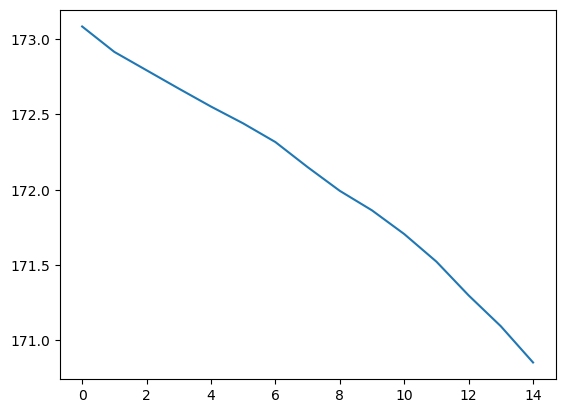

In [213]:
plt.plot(losses)

In [198]:
#create prediction and true label list
    
        
y_test_true = []
y_test_pred = []
# iterate over the test data
for i, data in enumerate(test_loader, 0):
    input_imgs, true_labels = data
    with torch.no_grad():
        pred_labels = model(input_imgs).round()
    
    y_test_true.extend(true_labels.numpy())
    y_test_pred.extend(pred_labels.numpy())

In [199]:
# %%
acc = accuracy_score(y_test_true, y_test_pred)
print(acc)
# %% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# %%
cm

0.5


array([[300,   0],
       [300,   0]], dtype=int64)

In [ ]:
#Changes Result
#lr= 0.0001 ---- 0.00001
#neurons = 200
#batch size=4
#epochs=15
#95.8% -----80%

In [ ]:
#Changes Result
#lr= 0.001 ---- 0.00001
#neurons = 100
#batch size=4
#epochs=15
#95.1% -----%


#SGD -50%